In [2]:
import pandas as pd
import numpy as np

from libs.simple_processing import separate_target

DATA = pd.read_csv('xor.csv', delimiter=';')

X, y = separate_target(DATA, 'y')

print(X.shape)
print('y:', y.shape)


(4, 2)
y: (4,)


In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# patience below 7 cuts to early
early_stopping = EarlyStopping(
    min_delta=0.0005,  # minimium amount of change to count as an improvement
    patience=7,  # how many epochs to wait before stopping
    restore_best_weights=True,
)
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=40)

X_train = X.copy()
y_train = y.copy()
X_valid = X.copy()
y_valid = y.copy()

input_shape = [X_train.shape[1]]
print(input_shape)
print(X_train.shape)

[2]
(4, 2)


In [9]:
print(y_train)

0    0
1    1
2    1
3    0
Name: y, dtype: int64


In [11]:
from tensorflow import keras
from tensorflow.keras import layers
from ann_visualizer.visualize import ann_viz
from graphviz import Source

# initially I got val loss 0.07 because Id column present. After removing it I got 0.13
# Then I experimented with optimizers, loss and activation functions and the number of layers and neurons and finally got it back to 0.0700

activation_function = 'relu'

model = keras.Sequential([
    layers.Dense(2, activation=activation_function, input_shape=input_shape),
    layers.Dense(5, activation=activation_function),
    layers.Dense(1)
])

model.compile(
    # optimizer='adam',
    #  loss='mae',
    loss='mean_squared_error',
    metrics=['accuracy']
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=4,# grupy danych
    epochs=250,
    callbacks=[early_stopping]
)
# print(model.summary())

ann_viz(model, title="XOR")
graph = Source.from_file('network.gv')
graph

history_df = pd.DataFrame(history.history)
print("Minimum Validation Loss: {:0.5f}".format(history_df['val_loss'].min()));

Epoch 1/250
1/1 [==============================] - 0s 371ms/step - loss: 0.5545 - accuracy: 0.5000 - val_loss: 0.5345 - val_accuracy: 0.5000
Epoch 2/250
1/1 [==============================] - ETA: 0s - loss: 0.5345 - accuracy: 0.5000

2022-09-23 08:00:18.700081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-23 08:00:18.860450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 22ms/step - loss: 0.5345 - accuracy: 0.5000 - val_loss: 0.5205 - val_accuracy: 0.5000
Epoch 3/250
1/1 [==============================] - 0s 24ms/step - loss: 0.5205 - accuracy: 0.5000 - val_loss: 0.5091 - val_accuracy: 0.5000
Epoch 4/250
1/1 [==============================] - 0s 25ms/step - loss: 0.5091 - accuracy: 0.5000 - val_loss: 0.4992 - val_accuracy: 0.5000
Epoch 5/250
1/1 [==============================] - 0s 26ms/step - loss: 0.4992 - accuracy: 0.5000 - val_loss: 0.4903 - val_accuracy: 0.5000
Epoch 6/250
1/1 [==============================] - 0s 26ms/step - loss: 0.4903 - accuracy: 0.5000 - val_loss: 0.4821 - val_accuracy: 0.5000
Epoch 7/250
1/1 [==============================] - 0s 29ms/step - loss: 0.4821 - accuracy: 0.5000 - val_loss: 0.4745 - val_accuracy: 0.5000
Epoch 8/250
1/1 [==============================] - 0s 29ms/step - loss: 0.4745 - accuracy: 0.5000 - val_loss: 0.4673 - val_accuracy: 0.5000
Epoch 9/250
1/1 [===============

In [12]:
print(model.predict(np.array([[0, 1]])))


1/1 [==============================] - 0s 64ms/step
[[1.0012327]]


2022-09-23 08:00:50.659038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


weights:  [[-0.34849173  0.7927852   0.5323792  -0.91339725  0.7211224 ]
 [-0.20247483 -0.3839736   0.91132045  0.8482443   0.10412359]]
biases:  [ 0.         -0.00097036 -0.00096259  0.         -0.00097353]


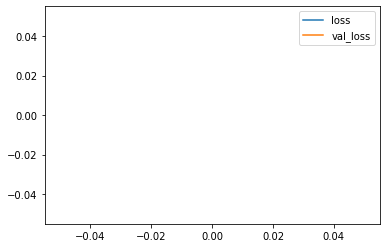

In [27]:
history_df.loc[109:, ['loss', 'val_loss']].plot()
weights = model.layers[1].get_weights()[0]
biases = model.layers[1].get_weights()[1]
print('weights: ', weights)
print('biases: ', biases)

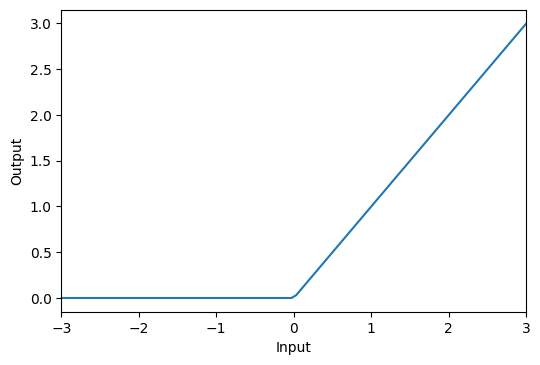

In [44]:
# Change 'relu' to 'elu', 'selu', 'swish'... or something else
# How different activation functions look like

import tensorflow as tf
import matplotlib.pyplot as plt

# print(tf.__version__)

activation_layer = layers.Activation('relu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x)  # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()